<a href="https://colab.research.google.com/github/ravij25/gravity/blob/main/Hilbert_Radon__5_profiles_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


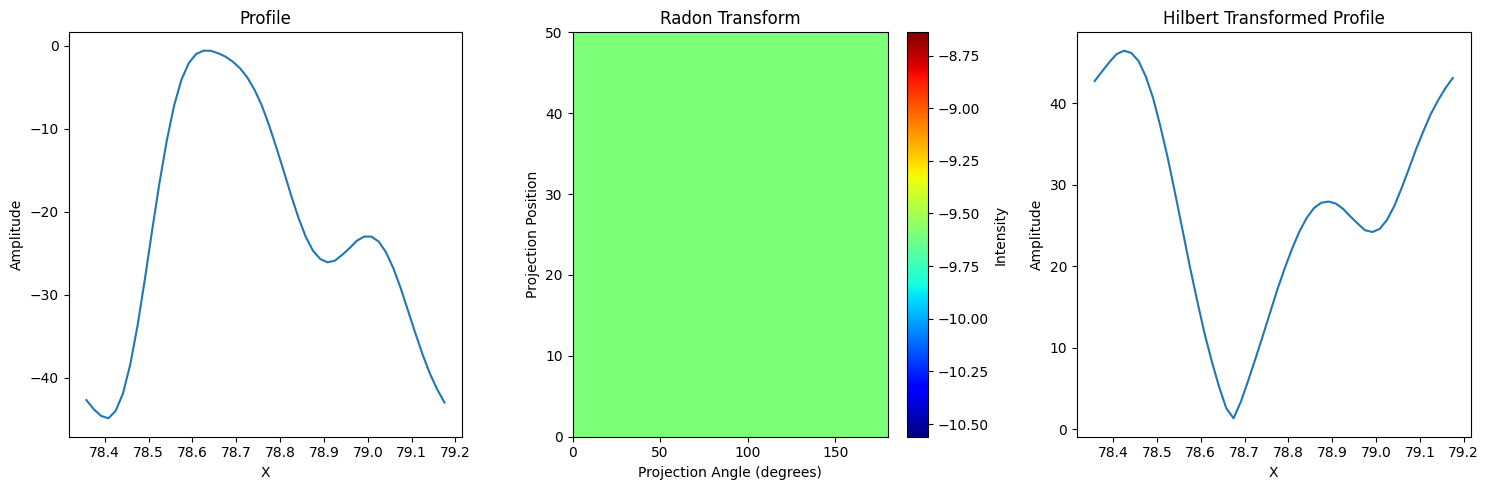

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import radon
from scipy.signal import hilbert

# Load Bouguer gravity anomaly data into a pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/ravij25/gravity/main/kadapa2.csv')

# Convert DataFrame columns to numpy arrays
x = data['Lat'].to_numpy()
y = data['Long'].to_numpy()
z = data['Bouger anomaly'].to_numpy()

# Randomly select a continuous profile of 50 points
start_index = np.random.randint(0, len(x) - 50)
end_index = start_index + 50
profile_x = x[start_index:end_index]
profile_y = y[start_index:end_index]
profile_z = z[start_index:end_index]

# Apply Radon transform to the profile
theta = np.linspace(0, 180, 180, endpoint=False)  # Use 180 angles for a full circle transform
sinogram = radon(profile_z.reshape(-1, 1), theta=theta)

# Apply Hilbert transform to the original profile
hilbert_transformed = hilbert(profile_z)

# Plot the profile, Radon transform, and Hilbert transformed profile
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(profile_x, profile_z)
plt.title('Profile')
plt.xlabel('X')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.imshow(sinogram, aspect='auto', extent=(0, 180, 0, len(profile_z)), cmap='jet')
plt.title('Radon Transform')
plt.xlabel('Projection Angle (degrees)')
plt.ylabel('Projection Position')
plt.colorbar(label='Intensity')

plt.subplot(1, 3, 3)
plt.plot(profile_x, np.abs(hilbert_transformed))
plt.title('Hilbert Transformed Profile')
plt.xlabel('X')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
